Dataset with students data extracted from Unir archive.  
Geodataframes extracted from the openlibraries https://datosabiertos.esri.co/ and https://sites.google.com/site/seriescol/shapes

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Default plot size is set.
plt.rcParams['figure.figsize'] = [15, 15]

# Geodataframe and dataset are loaded.
mun= gpd.read_file('mpio.shp')
ds = pd.read_csv('dataset.csv')

In [38]:
# Create a column "centroids" with the centroid information of each shape
mun['centroids'] = mun['geometry'].centroid
mun['area'] = mun['geometry'].area

# Create a separate array "coords" with this information, for space syntax analysis
coords = np.array(list((x,y) for x,y in zip(mun['centroids'].x , mun['centroids'].y)))
areas = np.array(list(mun['area']))
mun.head()

,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,DPTO,NOMBRE_DPT,MPIO,NOMBRE_MPI,NOMBRE_CAB,CLASEMUN,MPIOS,ZONA,OF_REG,REG_ZONAS,HECTARES,geometry,centroids,area
0,7.516766e+09,475636.130236,2,566,44,LA GUAJIRA,847,URIBIA,URIBIA,CM,44847,ZONA06,DABAR,DABARZONA06,751676.579,"POLYGON ((1290154.980 1796649.425, 1270385.550...",POINT (1248835.905 1818633.197),7.516766e+09
1,1.624663e+09,195961.387498,5,564,44,LA GUAJIRA,560,MANAURE,MANAURE,CM,44560,ZONA06,DABAR,DABARZONA06,162466.283,"POLYGON ((1187687.339 1800431.820, 1188158.788...",POINT (1164290.725 1775713.259),1.624663e+09
2,1.779934e+09,272174.538806,6,563,44,LA GUAJIRA,430,MAICAO,MAICAO,CM,44430,ZONA06,DABAR,DABARZONA06,177993.385,"POLYGON ((1198031.055 1767210.476, 1212713.613...",POINT (1194612.123 1751188.037),1.779934e+09
3,3.109950e+09,267346.564817,7,559,44,LA GUAJIRA,001,RIOHACHA,RIOHACHA,CM,44001,ZONA06,DABAR,DABARZONA06,310995.043,"POLYGON ((1156062.702 1755981.216, 1159630.667...",POINT (1122238.520 1735882.365),3.109950e+09
4,1.999866e+09,198794.872346,8,1052,44,LA GUAJIRA,090,DIBULLA,DIBULLA,CM,44090,ZONA06,DABAR,DABARZONA06,199986.641,"POLYGON ((1095571.713 1750924.096, 1097255.333...",POINT (1069674.362 1718541.477),1.999866e+09


In [67]:
print(areas[0])
print(coords[920])
print(mun['NOMBRE_MPI'][0])

7516765785.592962
[1241206.90426052  751965.56359525]
URIBIA


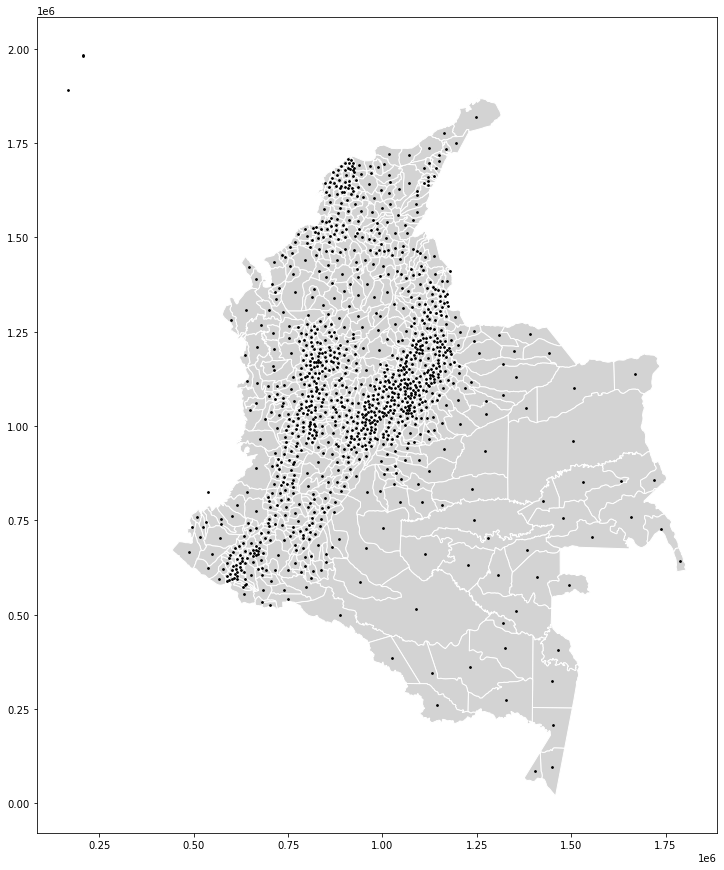

In [7]:
fig, ax = plt.subplots()
mun.plot(color='lightgrey', edgecolor='white', ax=ax)

ax.scatter(coords[:, 0], coords[:, 1], color='black', s=3)
plt.show()

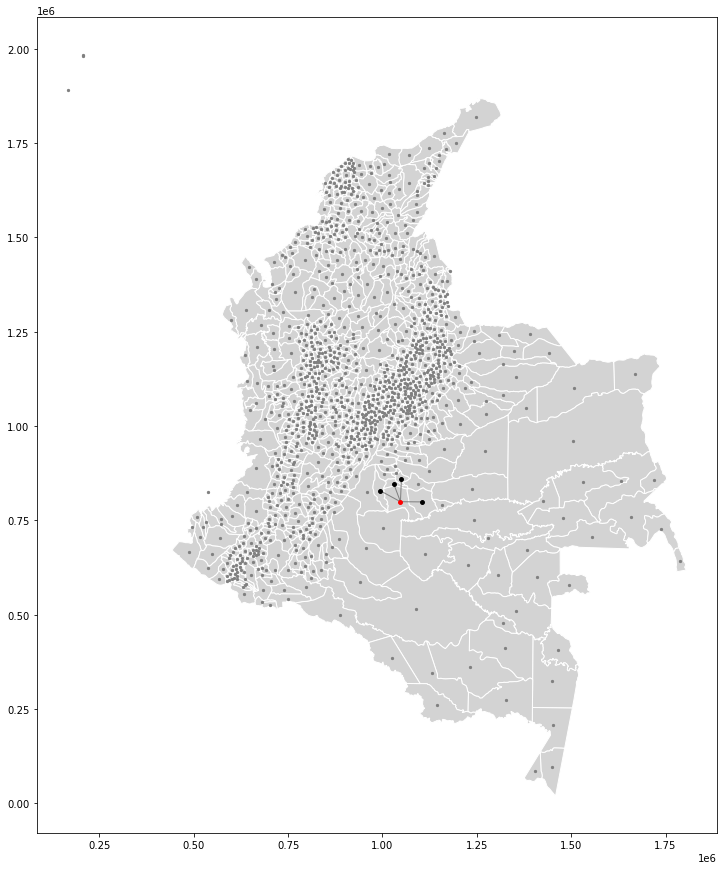

In [8]:
from sklearn.neighbors import NearestNeighbors

# n = n_neighbours, which minimum is 2 (just the closest one).
# If n = 3 it means the closest coords are the next 2 closest ones, in proximity order
X = coords
n = 5
nbrs = NearestNeighbors(n_neighbors = n, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# pt is the point to predict
pt = 900
pt_ind = X[indices[pt]]
 
# The plotting codes 
fig, ax = plt.subplots()
mun.plot(color='lightgrey', edgecolor='white', ax=ax)
ax.scatter(coords[:, 0], coords[:, 1], color='grey', s=5)

for i in range(n-1):
    ax.scatter(pt_ind[(i+1),0], pt_ind[(i+1),1], color='black', s=15, zorder=2)
    ax.plot((pt_ind[0,0],pt_ind[(i+1),0]), (pt_ind[0,1],pt_ind[(i+1),1]), color='grey',linewidth=1, zorder=1)
    
ax.scatter(pt_ind[0,0], pt_ind[0,1], color='red', s=15, zorder=2)

plt.show()

In [88]:
def nearest (pt):
    X = coords
    n = 2
    nbrs = NearestNeighbors(n_neighbors = n, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)

    # pt is the point to predict
    pt_ind = X[indices[pt]]

    # Data inference
   
    shape_area = areas[pt]
    proportion_area_dist = distances[pt,1] / (shape_area)**0.5
    print("The municipality is = " + str(mun['NOMBRE_MPI'][pt]))
    print("The closest centroid distance is = " + str( round((distances[pt,1]), 2)) + " m" )
    print("The shape area is = " + str(round(shape_area,2)) + " m2 \n         which is = " + str(round((shape_area/1000000),2)) + " km2")
    print("The proportion of the closest centroid distance by the root area is =", round(proportion_area_dist,2))

    # y differences
    northing = pt_ind[1,1]-pt_ind[0,1]
    print("The closest centroid is located = ", end='')
    if northing > 0:
        print("North ", end='')
    else:
        print("South ", end='')

    # x differences
    easting = pt_ind[1,0]-pt_ind[0,0]
    if easting > 0:
        print("East")
    else:
        print("West")


    # The plotting codes 
    fig, ax = plt.subplots()

    mun.plot(color='lightgrey', edgecolor='white', ax=ax)
    ax.scatter(coords[:, 0], coords[:, 1], color='grey', s=5)
    ax.add_patch(plt.Circle((pt_ind[0,0],pt_ind[0,1]), distances[pt,1], color='blue', fill=False))
    ax.plot((pt_ind[0,0],pt_ind[1,0]), (pt_ind[0,1],pt_ind[1,1]), color='blue',linewidth=1, zorder=1)
    ax.scatter(pt_ind[0,0], pt_ind[0,1], color='red', s=15, zorder=2)

    plt.show()

The municipality is = SAN JOSE DEL GUAVIARE
The closest centroid distance is = 60528.64 m
The shape area is = 24246259629.47 m2 
         which is = 24246.26 km2
The proportion of the closest centroid distance by the root area is = 0.39
The closest centroid is located = South East


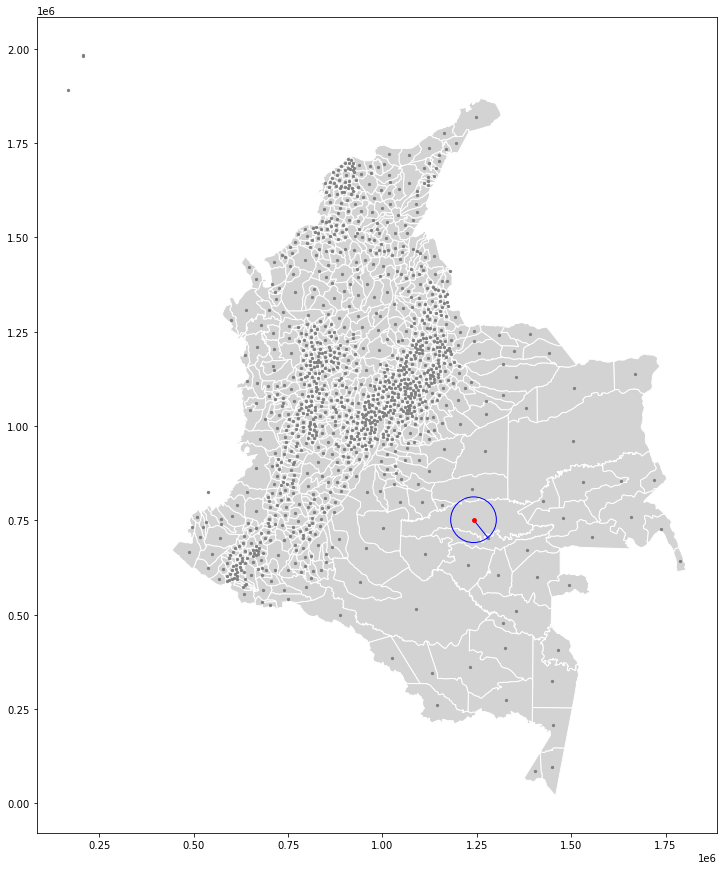

In [89]:
nearest (920)

The municipality is = CARURU
The closest centroid distance is = 84563.64 m
The shape area is = 7356448092.55 m2 
         which is = 7356.45 km2
The proportion of the closest centroid distance by the root area is = 0.99
The closest centroid is located = North West


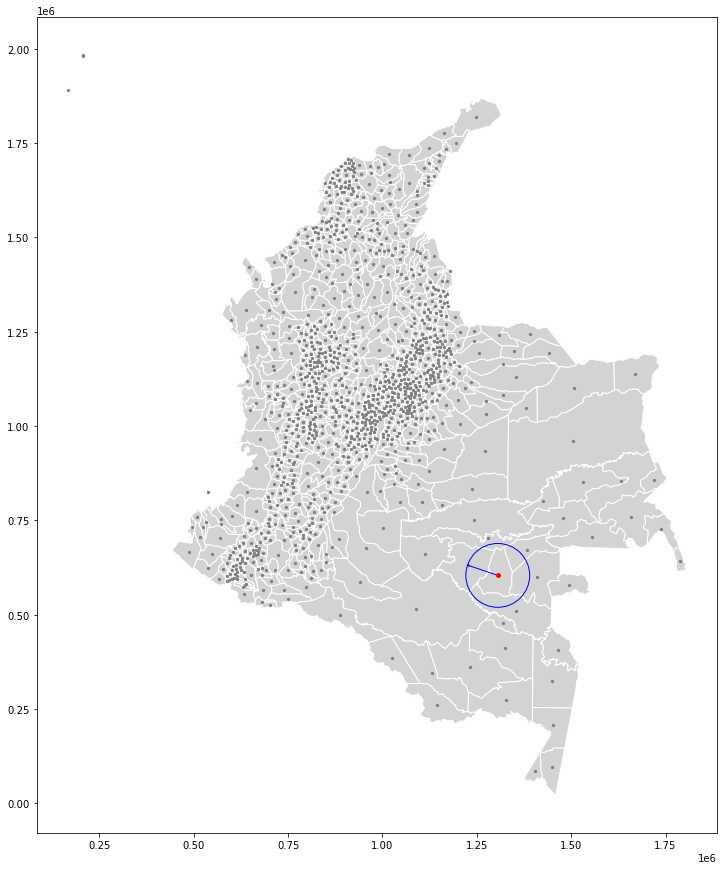

In [90]:
nearest (1000)

The municipality is = SAN FELIPE
The closest centroid distance is = 86221.96 m
The shape area is = 4342048501.98 m2 
         which is = 4342.05 km2
The proportion of the closest centroid distance by the root area is = 1.31
The closest centroid is located = North West


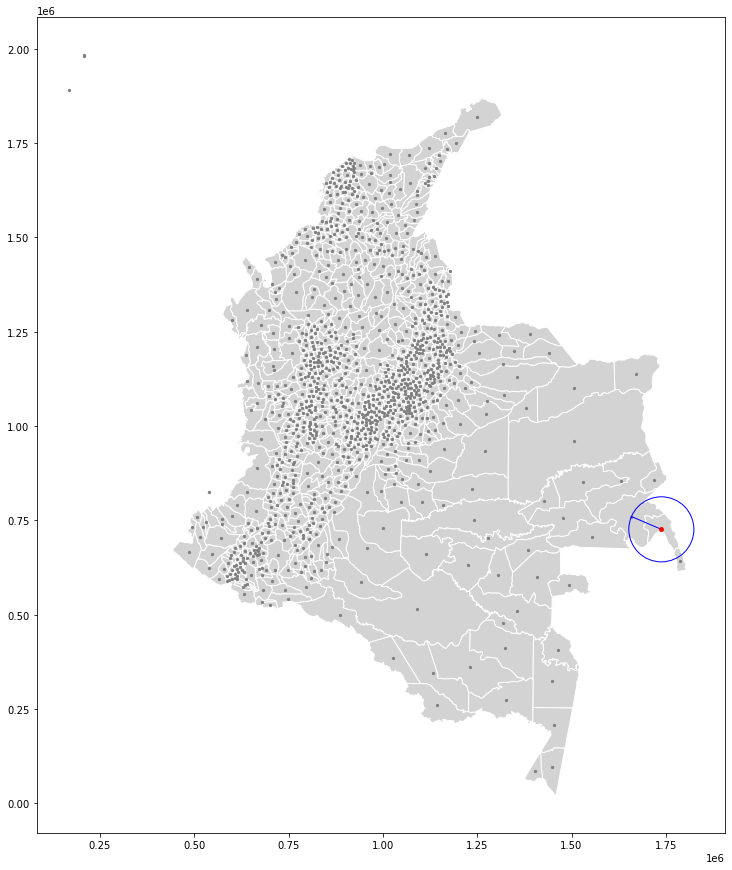

In [103]:
nearest (943)